In [1]:
from My_Explorer import *
from hog.hog import hog
import numpy as np
from ROC_plot.draw_plot import draw_roc_plot
from sklearn.metrics import roc_curve

In [8]:
from linearsvm.liblinearutil import *

In [9]:
def get_hog(x):
    X = []
    for tmpx in x:
        normalised_blocks , hog_image = normalised_blocks,hog_image = \
            hog(tmpx, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(4, 4), visualize=True)
        X.append(normalised_blocks)
    X = np.array(X)
    return X

In [10]:
dataset = MyExplorer(ipath,lpath)

In [11]:
train_x,train_y,valid_x,valid_y = dataset.split_single()

In [12]:
train_X = get_hog(train_x)
valid_X = get_hog(valid_x)

In [45]:
prob  = problem(train_y, train_X)
param = parameter('-c 1 -s 0')
m = train(prob, param)

In [90]:
c_list = [0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]

In [57]:
def get_linear_pred(c,name):
    param = parameter('-c %f -s 0'%c)
    m = train(prob, param)
    p_label, p_acc, p_val = predict(valid_y, valid_X, m,'-b 1')
    y_true = []
    for i in p_val:
        y_true.append(i[1])
    a = np.array(y_true)
    np.save(name,a)
    return y_true

In [65]:
def pic_test(test):
    a = np.load(test)
    y_true = a.tolist()
    plt.xlabel('False Alarm Rate')
    plt.ylabel('Recall')
    fpr, tpr, threshold = roc_curve(valid_y,y_true)
    plt.semilogx(fpr,tpr,color = 'red')
    plt.legend(loc='upper right', frameon=False)
    plt.show()

In [91]:
# get all c
    for c in c_list:
        name = 'liblinear_C_%f.npy'%c
        get_linear_pred(c,name)
# best liblinear : C = 0.5/1

Accuracy = 99.1002% (43174/43566) (classification)
Accuracy = 99.1002% (43174/43566) (classification)
Accuracy = 99.0979% (43173/43566) (classification)
Accuracy = 99.1117% (43179/43566) (classification)
Accuracy = 99.1117% (43179/43566) (classification)
Accuracy = 99.1048% (43176/43566) (classification)
Accuracy = 99.0704% (43161/43566) (classification)
Accuracy = 99.0084% (43134/43566) (classification)
Accuracy = 98.9671% (43116/43566) (classification)
Accuracy = 98.9579% (43112/43566) (classification)
Accuracy = 98.9028% (43088/43566) (classification)


In [74]:
color_list = ['red','blue','black','chocolate','yellow','green','pink','violet']
font = {'family': 'Times New Roman',  'weight': 'normal',  'size': 9, }

In [75]:
c05 = np.load('liblinear_C_0.5.npy').tolist()
c1 = np.load('liblinear_C_1.npy').tolist()
c2 = np.load('liblinear_C_2.npy').tolist()
c4 = np.load('liblinear_C_4.npy').tolist()

In [79]:
score_list = [c05,c1,c2,c4]
number_list = [0.5,1,2,4]

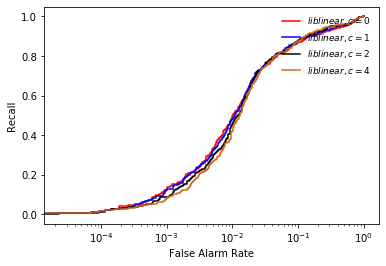

In [94]:
plt.xlabel('False Alarm Rate')
plt.ylabel('Recall')
for i in range(0,len(score_list)):
    num = number_list[i]
    y_pred = score_list[i]
    #y = valid_y
    #compute fpr & tpr
    fpr, tpr, threshold = roc_curve(valid_y,y_pred)
    plt.semilogx(fpr,tpr,color = color_list[i],label = '$liblinear,c=%i$'%num)
    plt.legend(loc='upper right', prop=font, frameon=False)
#save_fig_path = os.path.join(save_fig_path,fig_name)
plt.show()
    # plt.show()